In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from wordcloud import WordCloud

In [6]:
df=pd.read_csv('Covishield_tweets.csv')
df

,Unnamed: 0,Time,From-User,From-User-Id,Text,Retweet-Count
0,0,1/23/21 11:23 AM,Aditya Raj Kaul,44425241,"#BREAKING: India to send over 300,000 Covishie...",675.0
1,1,1/23/21 11:40 AM,Saket Gokhale,24857905,India cleared commercial exports of Covid-19 v...,762.0
2,2,1/22/21 6:12 PM,Adar Poonawalla,911182427782909952,Thank you Shri Uddhav Ji @CMOMaharashtra and @...,529.0
3,3,1/23/21 6:17 PM,??,2787411518,RT @abdulla_shahid: Maldives is happy to recei...,784.0
4,4,1/23/21 6:17 PM,Dr Vijay Chauthaiwale,75489786,RT @DrJankii: As per National Vaccination plan...,888.0
...,...,...,...,...,...,...
9994,9994,1/21/21 4:16 PM,Amrik Singh,1155391751240089601,@ians_india Please clear... they approached fo...,0.0
9995,9995,1/21/21 4:16 PM,? Nepal Communist Party??,2751926250,RT @Lunabs8: Covishield fact sheet ??? https:/...,10.0
9996,9996,1/21/21 4:15 PM,????? ?.,26728479,RT @mpeer: Fire breaks out at Serum Institute ...,5.0
9997,9997,1/21/21 4:15 PM,Artborntoshine@,996762919613313024,RT @SanjayBragta: A massive fire broke out at ...,185.0


In [7]:
df.head()

,Unnamed: 0,Time,From-User,From-User-Id,Text,Retweet-Count
0,0,1/23/21 11:23 AM,Aditya Raj Kaul,44425241,"#BREAKING: India to send over 300,000 Covishie...",675.0
1,1,1/23/21 11:40 AM,Saket Gokhale,24857905,India cleared commercial exports of Covid-19 v...,762.0
2,2,1/22/21 6:12 PM,Adar Poonawalla,911182427782909952,Thank you Shri Uddhav Ji @CMOMaharashtra and @...,529.0
3,3,1/23/21 6:17 PM,??,2787411518,RT @abdulla_shahid: Maldives is happy to recei...,784.0
4,4,1/23/21 6:17 PM,Dr Vijay Chauthaiwale,75489786,RT @DrJankii: As per National Vaccination plan...,888.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9999 non-null   int64  
 1   Time           9999 non-null   object 
 2   From-User      9999 non-null   object 
 3   From-User-Id   9999 non-null   int64  
 4   Text           9999 non-null   object 
 5   Retweet-Count  9999 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.8+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'Time', 'From-User', 'From-User-Id', 'Text',
       'Retweet-Count'],
      dtype='object')

In [15]:
text_df=df.drop(['Unnamed: 0', 'Time', 'From-User', 'From-User-Id',
       'Retweet-Count'],axis=1)
text_df

,Text
0,"#BREAKING: India to send over 300,000 Covishie..."
1,India cleared commercial exports of Covid-19 v...
2,Thank you Shri Uddhav Ji @CMOMaharashtra and @...
3,RT @abdulla_shahid: Maldives is happy to recei...
4,RT @DrJankii: As per National Vaccination plan...
...,...
9994,@ians_india Please clear... they approached fo...
9995,RT @Lunabs8: Covishield fact sheet ??? https:/...
9996,RT @mpeer: Fire breaks out at Serum Institute ...
9997,RT @SanjayBragta: A massive fire broke out at ...


In [16]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

#BREAKING: India to send over 300,000 Covishield vaccines to SriLanka on 27th January, SL President Gotabaya Rajapakse has just announced at an event. 

India cleared commercial exports of Covid-19 vaccines y'day even when we haven't pre-ordered enough to cover our population.

Ironically, the exports are ALL SII's Covishield (no Covaxin)

Modi's 'vaccine diplomacy': Let Indians suffer but I'll earn brownie points overseas. 

Thank you Shri Uddhav Ji @CMOMaharashtra and @AUThackeray for visiting @SerumInstIndia and extending your help and support during this terrible crisis. As you have seen, the production of #COVISHIELD is on schedule and remains unaffected by this tragedy. https://t.co/H4GxubS67U 

RT @abdulla_shahid: Maldives is happy to receive as grant, 100,000 doses of Covishield developed by Serum Institute of India - among the fi 

RT @DrJankii: As per National Vaccination plan, I've just received my Made in India Covishield vaccine. As a medical professional, I can sa 



In [29]:
def data_processing(text):
    text=text.lower()
    text=re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [30]:
text_df = text_df.drop_duplicates('Text')

In [31]:
text_df.Text=text_df['Text'].apply(data_processing)

In [32]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [33]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

breaking india send 300000 covishield vaccines srilanka 27th january sl president gotabaya rajapakse announced event 

india cleared commercial exports covid19 vaccines yday even havent preordered enough cover population ironically exports siis covishield covaxin modis vaccine diplomacy let indians suffer ill earn brownie points overseas 

thank shri uddhav ji cmomaharashtra authackeray visiting seruminstindia extending help support terrible crisis seen production covishield schedule remains unaffected tragedy 

rt abdulla_shahid maldives happy receive grant 100000 doses covishield developed serum institute india among fi 

rt drjankii per national vaccination plan ive received made india covishield vaccine medical professional sa 



In [35]:
text_df['Text'] = text_df['Text'].apply(lambda x: stemming(x))

In [36]:
text_df.head()

,Text
0,breaking india send 300000 covishield vaccines...
1,india cleared commercial exports covid19 vacci...
2,thank shri uddhav ji cmomaharashtra authackera...
3,rt abdulla_shahid maldives happy receive grant...
4,rt drjankii per national vaccination plan ive ...


In [46]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [47]:
text_df['polarity']=text_df['Text'].apply(polarity)

In [48]:
text_df.head(10)


,Text,polarity
0,breaking india send 300000 covishield vaccines...,0.000000
1,india cleared commercial exports covid19 vacci...,-0.166667
2,thank shri uddhav ji cmomaharashtra authackera...,-0.525000
3,rt abdulla_shahid maldives happy receive grant...,0.450000
4,rt drjankii per national vaccination plan ive ...,0.050000
5,rt saketgokhale india cleared commercial expor...,0.000000
7,rt minhazmerchant nawabs negativity wont like ...,-0.093750
8,rt taslimanasreen bangladesh buying 30 million...,0.000000
12,rt rezhasan india start commercial supplies co...,0.000000
13,first person receive covishield vaccine hospit...,0.075000


In [52]:
def sentiment(label):
    if label<0:
        return "Negative"
    if label>0:
        return "Positive"
    if label==0:
        return "Neutral"
text_df['sentiment']=text_df['polarity'].apply(sentiment)    
    

In [54]:
text_df

,Text,polarity,Sentiment,sentiment
0,breaking india send 300000 covishield vaccines...,0.000000,Neutral,Neutral
1,india cleared commercial exports covid19 vacci...,-0.166667,Negative,Negative
2,thank shri uddhav ji cmomaharashtra authackera...,-0.525000,Negative,Negative
3,rt abdulla_shahid maldives happy receive grant...,0.450000,Positive,Positive
4,rt drjankii per national vaccination plan ive ...,0.050000,Positive,Positive
...,...,...,...,...
9982,rt ankpopat breaking pune fire breaks serum in...,0.000000,Neutral,Neutral
9983,fire breaks seruminstituteofindia facility pun...,0.118182,Positive,Positive
9986,fire unlikely affect production covishield cor...,-0.200000,Negative,Negative
9994,ians_india please clear approached siis covish...,0.100000,Positive,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

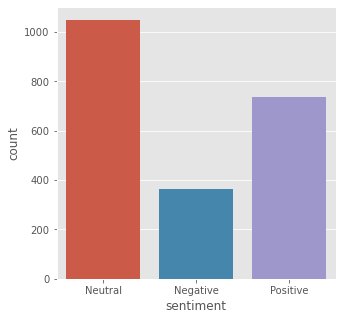

In [55]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

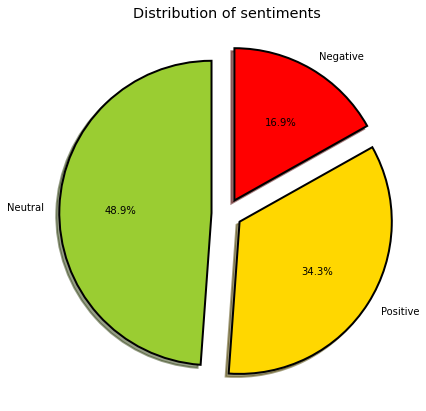

In [56]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [57]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Text,polarity,Sentiment,sentiment
2133,rt skasvsus saddened news item worlds best res...,1.0,Positive,Positive
3641,prasadgurubmc skodineya covishield data truste...,1.0,Positive,Positive
3366,saddened news item worlds best results showing...,1.0,Positive,Positive
680,rt mohamednasheed wonderful sight 100000 doses...,1.0,Positive,Positive
974,ideally immunocompromised ppl take covishield ...,0.9,Positive,Positive


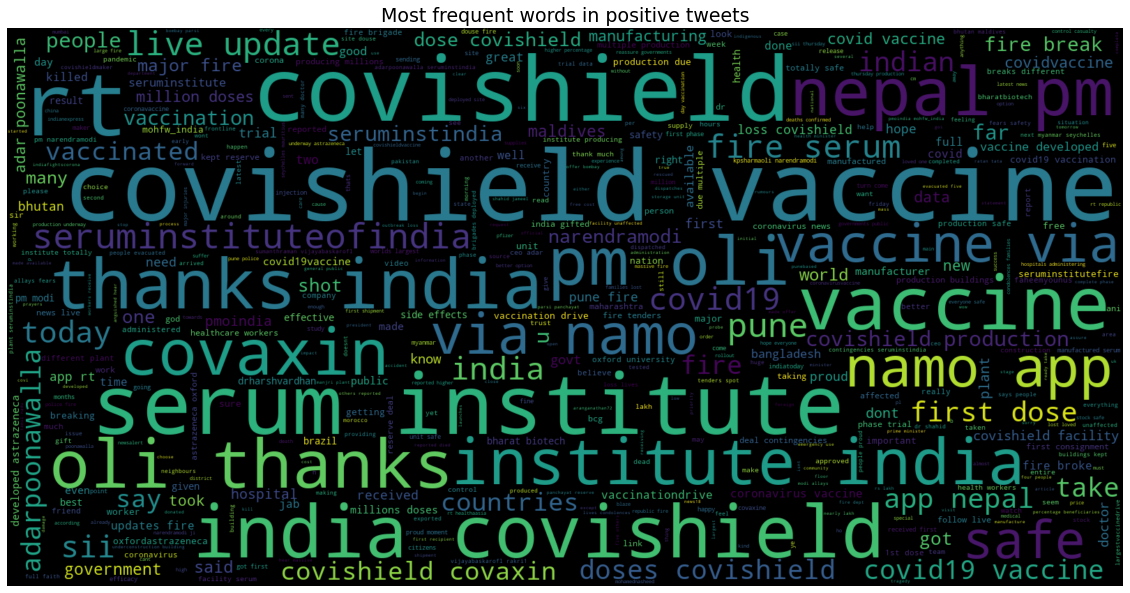

In [59]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [60]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= True)
neg_tweets.head(10)

,Text,polarity,Sentiment,sentiment
5252,rt nilampa57454782 terrible movement fire brea...,-1.000,Negative,Negative
9122,terrible movement fire breaks serum institute ...,-1.000,Negative,Negative
3105,rt firstpost narendramodi harshvardhan ram nat...,-0.800,Negative,Negative
3130,narendramodi harshvardhan ram nath kovind rahu...,-0.800,Negative,Negative
668,sab librandus ko covishield pfizer wala vaccin...,-0.800,Negative,Negative
2081,suhasinih covishield exported covaxin used stu...,-0.800,Negative,Negative
5725,seems like someone get bad se covishield insti...,-0.700,Negative,Negative
3838,breaking 5 people died fire underconstruction ...,-0.700,Negative,Negative
744,shame vaccine approval process authorities hea...,-0.600,Negative,Negative
2,thank shri uddhav ji cmomaharashtra authackera...,-0.525,Negative,Negative


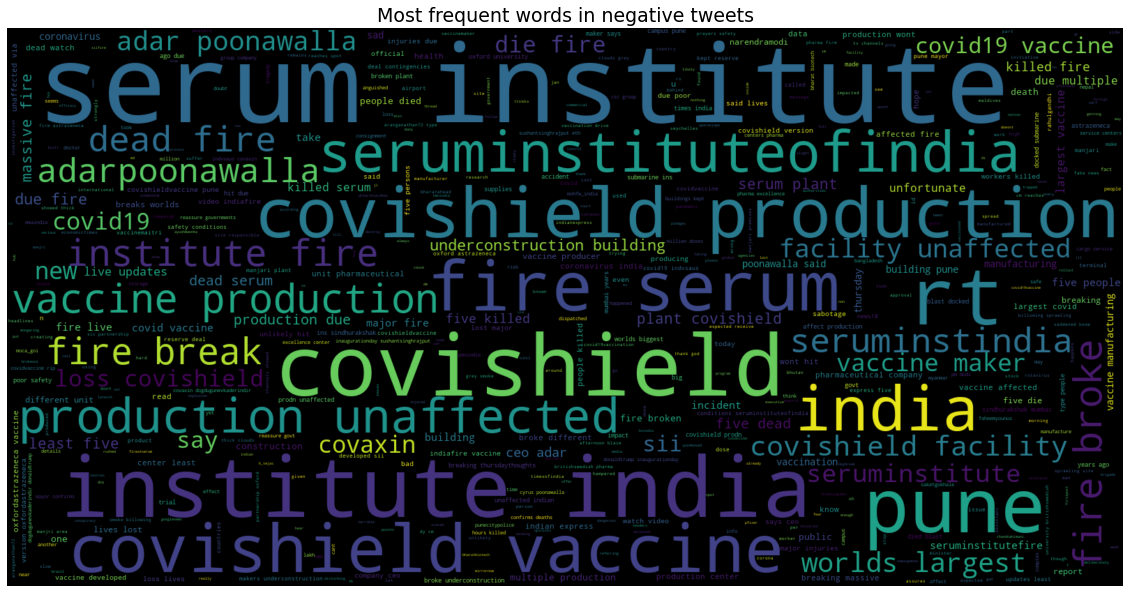

In [61]:
text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [62]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Text,polarity,Sentiment,sentiment
0,breaking india send 300000 covishield vaccines...,0.0,Neutral,Neutral
4871,surya_sarathi covishield,0.0,Neutral,Neutral
4879,nepal pride relationship india nepal forever c...,0.0,Neutral,Neutral
4902,basic difference covaxin covishield via biolog...,0.0,Neutral,Neutral
4908,effectiveness covishield 99 strike rate panaut...,0.0,Neutral,Neutral


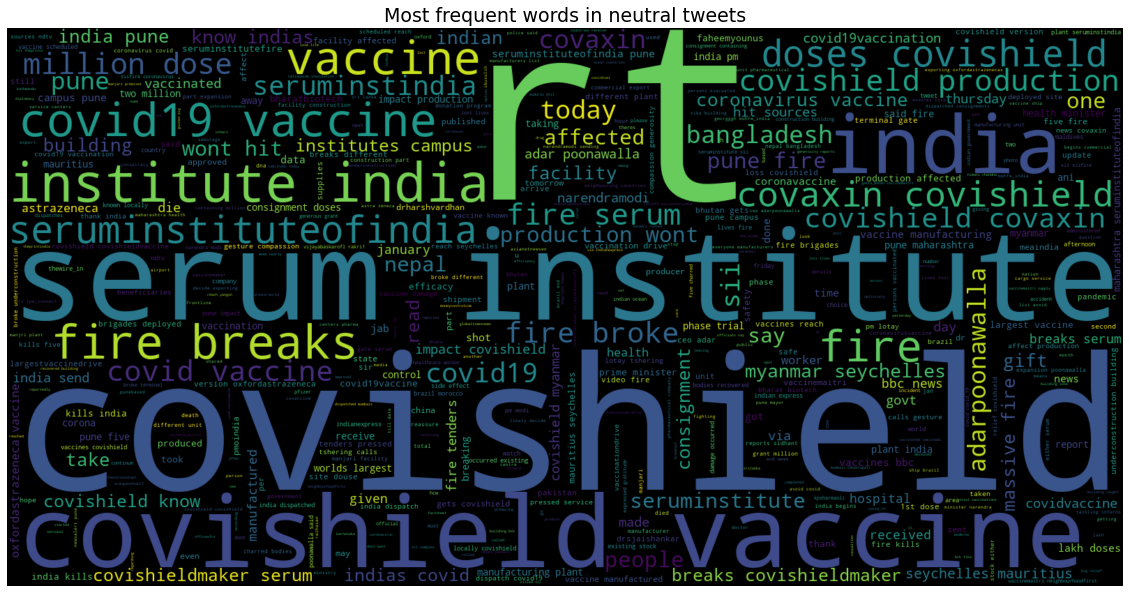

In [63]:
text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [64]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 19759

First 20 features:
 ['0002', '0002 perce', '0002 percent', '018', '018 percent', '10', '10 11', '10 crore', '10 doses', '10 fi', '10 fire', '10 hours', '10 lacs', '10 lakh', '10 lakhs', '10 samayanallur', '100', '100 countries', '100 covishield', '100 frontline']


C:\Users\amogh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
X = text_df['Text']
Y = text_df['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1717, 19759)
Size of y_train: (1717,)
Size of x_test: (430, 19759)
Size of y_test: (430,)


In [66]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.72%


In [68]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 45  20   8]
 [  2 199   7]
 [  6  27 116]]


              precision    recall  f1-score   support

    Negative       0.85      0.62      0.71        73
     Neutral       0.81      0.96      0.88       208
    Positive       0.89      0.78      0.83       149

    accuracy                           0.84       430
   macro avg       0.85      0.78      0.81       430
weighted avg       0.84      0.84      0.83       430



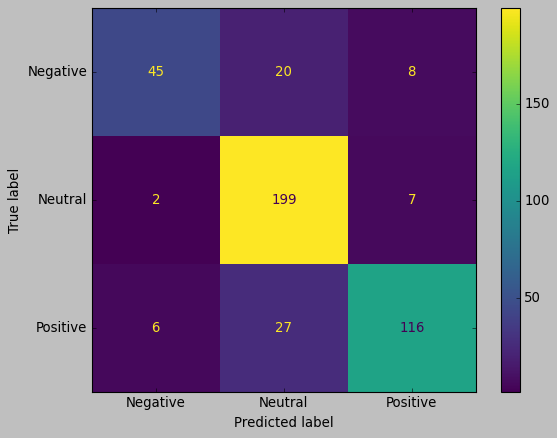

In [69]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [78]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [79]:
y_pred = grid.predict(x_test)

In [80]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.72%


In [82]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 45  20   8]
 [  2 199   7]
 [  6  27 116]]


              precision    recall  f1-score   support

    Negative       0.85      0.62      0.71        73
     Neutral       0.81      0.96      0.88       208
    Positive       0.89      0.78      0.83       149

    accuracy                           0.84       430
   macro avg       0.85      0.78      0.81       430
weighted avg       0.84      0.84      0.83       430



In [83]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [84]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 85.58%


In [85]:

print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 52  16   5]
 [  2 199   7]
 [  8  24 117]]


              precision    recall  f1-score   support

    Negative       0.84      0.71      0.77        73
     Neutral       0.83      0.96      0.89       208
    Positive       0.91      0.79      0.84       149

    accuracy                           0.86       430
   macro avg       0.86      0.82      0.83       430
weighted avg       0.86      0.86      0.85       430



In [86]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [87]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [88]:
y_pred = grid.predict(x_test)

In [89]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.35%


In [ ]:
#logistic Regression-83.72%
#tuned Logistic Regression-83.72%
#SVC-85.58%
#tuned SVC-85.35%